# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems

A classification is were you try to classify something as one or another. There is a few types of classifications:
* Binaryy classification
* Multiclass classification
* Multilabel classification

In [1]:
import tensorflow as tf

## Creting data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now... let's visualize it!

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


Our data is a little hard to understand right now... let's visualize it

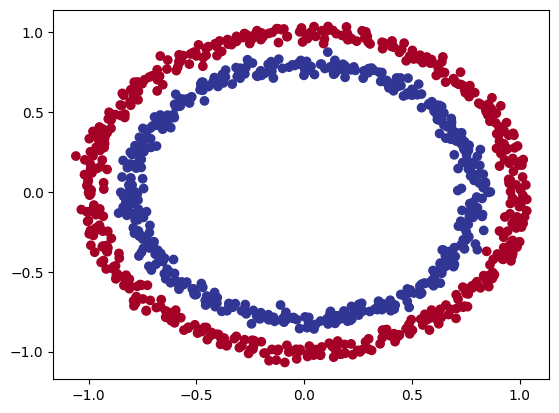

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes of our neural network

In [7]:
# Check sgapes of our features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modelling with Tensorflow are typically:
1. Create or import model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.4722 - loss: 6.8905 
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.3948 - loss: 6.4360
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.3905 - loss: 6.2768
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.4553 - loss: 7.3067
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.4830 - loss: 8.3336


In [11]:
# Let's try and improve our model by traning for longer...
model_1.fit(X, y, epochs=200, verbose=0)

In [12]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.4955 - loss: 8.1322 


[8.059046745300293, 0.5]

Since we're working on a binary classification problem and our model is getting around - 50% accuracy... it's performing as if it's guessing

So let's step things up a notch and add an extra layer.

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4288 - loss: 4.4598   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.4652 - loss: 0.7828
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.4680 - loss: 0.7117
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.4635 - loss: 0.6998
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.4516 - loss: 0.6966
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.4447 - loss: 0.6955
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.4541 - loss: 0.6951
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.4611 - loss: 0.6949
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4584 - loss: 0.6949 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4519 - loss: 0.6948 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.4481 - loss: 0.6948
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

In [14]:
#Evaluate the model
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5027 - loss: 0.6930  


[0.6933230757713318, 0.4909999966621399]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model. 

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compile a model - here we might to choose a different optimization functions such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs.

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.5052 - loss: 0.6916


[0.6946261525154114, 0.49000000953674316]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [17]:
import numpy as np

In [19]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step 
doing binary classifcation...


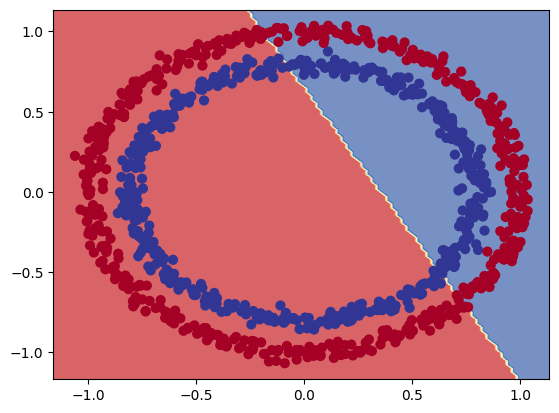

In [20]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)